In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score # AUC score
from sklearn.metrics import average_precision_score # AUPR score
from sklearn.metrics import precision_recall_fscore_support # precision, recall
from imblearn.metrics import sensitivity_specificity_support # sensitivity, specificity
from sklearn.metrics import roc_curve # to draw auc curve
from sklearn.metrics import precision_recall_curve # to draw aupr curve
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
gold_pos = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/data/desc_12/gold_pos_desc12.tsv")
gold_neg = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/data/desc_12/gold_neg_desc12.tsv")
gold = pd.concat([gold_pos, gold_neg])
x_whole_data = gold[gold.columns.values[3:].tolist()].values
y_whole_data = gold["association"].values

In [4]:
indep = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/data/desc_12/indep_desc12.tsv")
indep_x = indep.values[:, 3:].astype(float)
indep_y = indep.values[:,2].astype(int)

In [5]:
# undersampler
rus = RandomUnderSampler(ratio=0.5)

In [43]:
x_resampled, y_resampled = rus.fit_sample(x_whole_data, y_whole_data)

2017-06-04 01:44:08
1------------------------------------


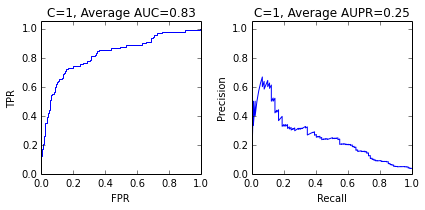

2017-06-04 01:44:09


In [44]:
# Independent LR_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
lr = Trial()
lr.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10}
with open(path + "901_LR_all_desc_indep.txt", 'w') as fd :
    user_c = 1
    lr.param['c']=user_c
    fd.write("<independent>\r\n")
    lr.indep_folds_results, lr.indep_draw_results = lr.Logist_Regression_independent_graph(x_resampled, y_resampled, indep_x, indep_y, lr.param)
    lr.draw_plot([lr.indep_draw_results], lr.indep_folds_results, user_c)
    lr.write_output(fd, lr.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [6]:
x_resamples =list()
y_resamples =list()
for i in range(30):
    x_resampled, y_resampled = rus.fit_sample(x_whole_data, y_whole_data)
    x_resamples.append(x_resampled)
    y_resamples.append(y_resampled)

2017-06-04 02:14:32
1------------------------------------


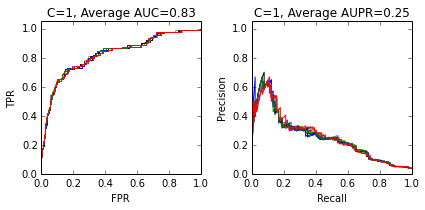

2017-06-04 02:14:35


In [51]:
# Independent LR_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
lr = Trial()
#lr.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10}
lr.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, ''}
lr.indep_results = dict()
lr.indep_draw_results = list()
independent_count = 30 
with open(path + "921_LR_all_desc_indep.txt", 'w') as fd :
    user_c = 1
    lr.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    for i in range(10):
        x_resampled = x_resamples[i]
        lr.indep_folds_result, lr.indep_draw_result = lr.Logist_Regression_independent_graph(x_resampled, y_resampled, indep_x, indep_y, lr.param)
        lr.indep_results[i] = lr.indep_folds_result
        lr.indep_draw_results.append(lr.indep_draw_result)
    lr.indep_seperated = lr.seperate_results(lr.indep_results)
    lr.indep_final_results = lr.indep_average_result(lr.indep_seperated)    
    lr.draw_plot(lr.indep_draw_results, lr.indep_final_results, user_c)
    lr.write_output(fd, lr.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 01:44:28
1200------------------------------------


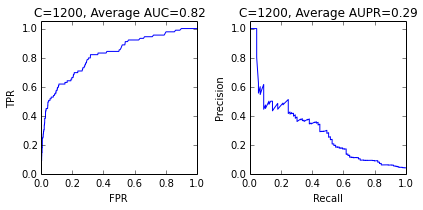

2017-06-04 01:44:35


In [45]:
# rfependent RF_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
rf = Trial()
rf.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10}
with open(path + "902_RF_desc_indep.txt", 'w') as fd :
    user_c = 1200
    rf.param['c']=user_c
    fd.write("<independent>\r\n")
    rf.indep_folds_results, rf.indep_draw_results = rf.Random_Forest_independent_graph(x_resampled, y_resampled, indep_x, indep_y, rf.param)
    rf.draw_plot([rf.indep_draw_results], rf.indep_folds_results, user_c)
    rf.write_output(fd, rf.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 01:39:47
1200------------------------------------


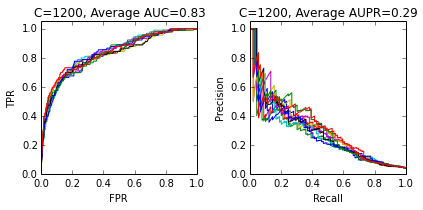

2017-06-04 01:40:51


In [42]:
# Independent rf_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
rf = Trial()
rf.param={'c':0, 'kernel' : 'linear', 'degree' : 2, 'k' : 10}
rf.indep_results = dict()
rf.indep_draw_results = list()
independent_count = 10 
with open(path + "912_rf_all_desc_indep.txt", 'w') as fd :
    user_c = 1200
    rf.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    for i in range(10):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        rf.indep_folds_result, rf.indep_draw_result = rf.Random_Forest_independent_graph(x_resampled, y_resampled, indep_x, indep_y, rf.param)
        rf.indep_results[i] = rf.indep_folds_result
        rf.indep_draw_results.append(rf.indep_draw_result)
    rf.indep_seperated = rf.seperate_results(rf.indep_results)
    rf.indep_final_results = rf.indep_average_result(rf.indep_seperated)    
    rf.draw_plot(rf.indep_draw_results, rf.indep_final_results, user_c)
    rf.write_output(fd, rf.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 02:16:36
1200------------------------------------


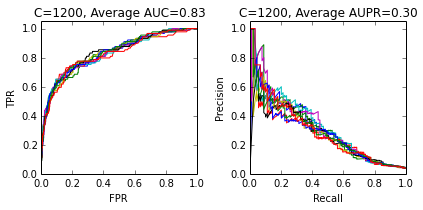

2017-06-04 02:17:41


In [52]:
# Independent rf_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
rf = Trial()
rf.param={'c':0, 'kernel' : 'linear', 'degree' : 2, 'k' : 10}
rf.indep_results = dict()
rf.indep_draw_results = list()
independent_count = 10 
with open(path + "922_rf_all_desc_indep.txt", 'w') as fd :
    user_c = 1200
    rf.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    for i in range(10):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        rf.indep_folds_result, rf.indep_draw_result = rf.Random_Forest_independent_graph(x_resampled, y_resampled, indep_x, indep_y, rf.param)
        rf.indep_results[i] = rf.indep_folds_result
        rf.indep_draw_results.append(rf.indep_draw_result)
    rf.indep_seperated = rf.seperate_results(rf.indep_results)
    rf.indep_final_results = rf.indep_average_result(rf.indep_seperated)    
    rf.draw_plot(rf.indep_draw_results, rf.indep_final_results, user_c)
    rf.write_output(fd, rf.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 01:44:55
1000------------------------------------


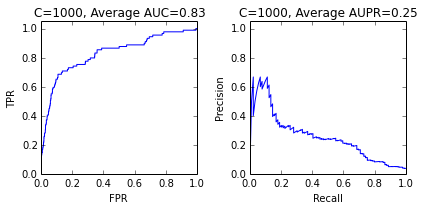

2017-06-04 01:45:04


In [46]:
# svm_li_independent svm_li_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_li = Trial()
svm_li.param={'c':0, 'kernel' : 'linear', 'degree' : 2, 'k' : 10}
with open(path + "903_SVM(linear)_desc_indep.txt", 'w') as fd :
    user_c = 1000
    svm_li.param['c']=user_c
    fd.write("<independent>\r\n")
    svm_li.indep_folds_results, svm_li.indep_draw_results = svm_li.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_li.param)
    svm_li.draw_plot([svm_li.indep_draw_results], svm_li.indep_folds_results, user_c)
    svm_li.write_output(fd, svm_li.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 01:33:04
1000------------------------------------


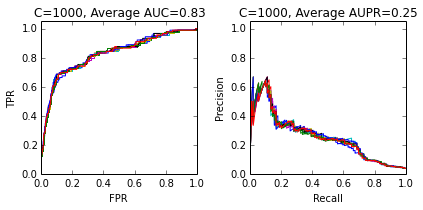

2017-06-04 01:34:39


In [38]:
# Independent svm_li_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_li = Trial()
svm_li.param={'c':0, 'kernel' : 'linear', 'degree' : 2, 'k' : 10}
svm_li.indep_results = dict()
svm_li.indep_draw_results = list()
independent_count = 10 
with open(path + "913_svm_li_all_desc_indep.txt", 'w') as fd :
    user_c = 1000
    svm_li.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    for i in range(10):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        svm_li.indep_folds_result, svm_li.indep_draw_result = svm_li.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_li.param)
        svm_li.indep_results[i] = svm_li.indep_folds_result
        svm_li.indep_draw_results.append(svm_li.indep_draw_result)
    svm_li.indep_seperated = svm_li.seperate_results(svm_li.indep_results)
    svm_li.indep_final_results = svm_li.indep_average_result(svm_li.indep_seperated)    
    svm_li.draw_plot(svm_li.indep_draw_results, svm_li.indep_final_results, user_c)
    svm_li.write_output(fd, svm_li.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 02:17:41
1000------------------------------------


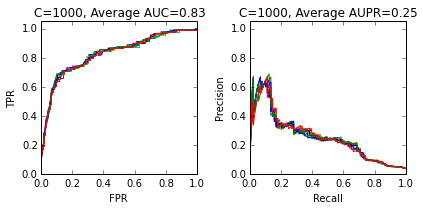

2017-06-04 02:19:22


In [53]:
# Independent svm_li_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_li = Trial()
svm_li.param={'c':0, 'kernel' : 'linear', 'degree' : 2, 'k' : 10}
svm_li.indep_results = dict()
svm_li.indep_draw_results = list()
independent_count = 10 
with open(path + "923_svm_li_all_desc_indep.txt", 'w') as fd :
    user_c = 1000
    svm_li.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    for i in range(10):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        svm_li.indep_folds_result, svm_li.indep_draw_result = svm_li.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_li.param)
        svm_li.indep_results[i] = svm_li.indep_folds_result
        svm_li.indep_draw_results.append(svm_li.indep_draw_result)
    svm_li.indep_seperated = svm_li.seperate_results(svm_li.indep_results)
    svm_li.indep_final_results = svm_li.indep_average_result(svm_li.indep_seperated)    
    svm_li.draw_plot(svm_li.indep_draw_results, svm_li.indep_final_results, user_c)
    svm_li.write_output(fd, svm_li.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 01:45:18
10000------------------------------------


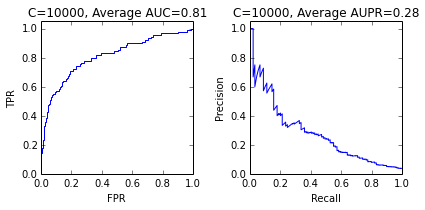

2017-06-04 01:45:28


In [47]:
# svm_qu_independent svm_qu_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_qu = Trial()
svm_qu.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10}
with open(path + "904_SVM(quadratic)_desc_indep.txt", 'w') as fd :
    user_c = 10000
    svm_qu.param['c']=user_c
    fd.write("<independent>\r\n")
    svm_qu.indep_folds_results, svm_qu.indep_draw_results = svm_qu.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_qu.param)
    svm_qu.draw_plot([svm_qu.indep_draw_results], svm_qu.indep_folds_results, user_c)
    svm_qu.write_output(fd, svm_qu.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 01:34:39
10000------------------------------------


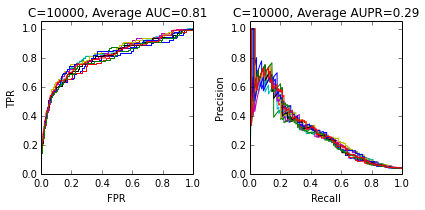

2017-06-04 01:36:07


In [39]:
# Independent svm_qu_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_qu = Trial()
svm_qu.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10}
svm_qu.indep_results = dict()
svm_qu.indep_draw_results = list()
independent_count = 10 
with open(path + "914_svm_qu_all_desc_indep.txt", 'w') as fd :
    user_c = 10000
    svm_qu.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    for i in range(10):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        svm_qu.indep_folds_result, svm_qu.indep_draw_result = svm_qu.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_qu.param)
        svm_qu.indep_results[i] = svm_qu.indep_folds_result
        svm_qu.indep_draw_results.append(svm_qu.indep_draw_result)
    svm_qu.indep_seperated = svm_qu.seperate_results(svm_qu.indep_results)
    svm_qu.indep_final_results = svm_qu.indep_average_result(svm_qu.indep_seperated)    
    svm_qu.draw_plot(svm_qu.indep_draw_results, svm_qu.indep_final_results, user_c)
    svm_qu.write_output(fd, svm_qu.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 02:19:22
10000------------------------------------


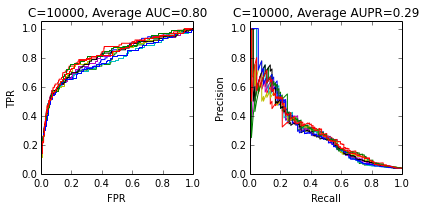

2017-06-04 02:20:59


In [54]:
# Independent svm_qu_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_qu = Trial()
svm_qu.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10}
svm_qu.indep_results = dict()
svm_qu.indep_draw_results = list()
independent_count = 10 
with open(path + "924_svm_qu_all_desc_indep.txt", 'w') as fd :
    user_c = 10000
    svm_qu.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    for i in range(10):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        svm_qu.indep_folds_result, svm_qu.indep_draw_result = svm_qu.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_qu.param)
        svm_qu.indep_results[i] = svm_qu.indep_folds_result
        svm_qu.indep_draw_results.append(svm_qu.indep_draw_result)
    svm_qu.indep_seperated = svm_qu.seperate_results(svm_qu.indep_results)
    svm_qu.indep_final_results = svm_qu.indep_average_result(svm_qu.indep_seperated)    
    svm_qu.draw_plot(svm_qu.indep_draw_results, svm_qu.indep_final_results, user_c)
    svm_qu.write_output(fd, svm_qu.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 01:45:28
1000------------------------------------


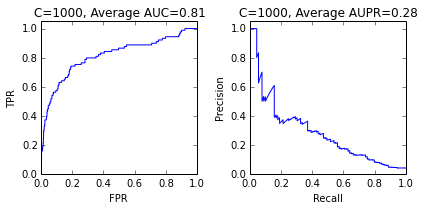

2017-06-04 01:45:30


In [48]:
# svm_cu_independent svm_cu_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_cu = Trial()
svm_cu.param={'c':0, 'kernel' : 'poly', 'degree' : 3, 'k' : 10}
with open(path + "905_SVM(cubic)_desc_indep.txt", 'w') as fd :
    user_c = 1000
    svm_cu.param['c']=user_c
    fd.write("<independent>\r\n")
    svm_cu.indep_folds_results, svm_cu.indep_draw_results = svm_cu.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_cu.param)
    svm_cu.draw_plot([svm_cu.indep_draw_results], svm_cu.indep_folds_results, user_c)
    svm_cu.write_output(fd, svm_cu.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 01:38:55
1000------------------------------------


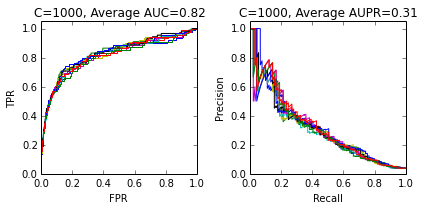

2017-06-04 01:39:14


In [40]:
# Independent svm_cu_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_cu = Trial()
svm_cu.param={'c':0, 'kernel' : 'poly', 'degree' : 3, 'k' : 10}
svm_cu.indep_results = dict()
svm_cu.indep_draw_results = list()
independent_count = 10 
with open(path + "914_svm_cu_all_desc_indep.txt", 'w') as fd :
    user_c = 1000
    svm_cu.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    for i in range(10):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        svm_cu.indep_folds_result, svm_cu.indep_draw_result = svm_cu.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_cu.param)
        svm_cu.indep_results[i] = svm_cu.indep_folds_result
        svm_cu.indep_draw_results.append(svm_cu.indep_draw_result)
    svm_cu.indep_seperated = svm_cu.seperate_results(svm_cu.indep_results)
    svm_cu.indep_final_results = svm_cu.indep_average_result(svm_cu.indep_seperated)    
    svm_cu.draw_plot(svm_cu.indep_draw_results, svm_cu.indep_final_results, user_c)
    svm_cu.write_output(fd, svm_cu.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 02:20:59
1000------------------------------------


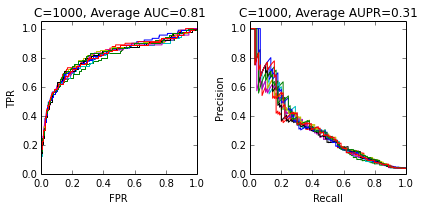

2017-06-04 02:21:19


In [55]:
# Independent svm_cu_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_cu = Trial()
svm_cu.param={'c':0, 'kernel' : 'poly', 'degree' : 3, 'k' : 10}
svm_cu.indep_results = dict()
svm_cu.indep_draw_results = list()
independent_count = 10 
with open(path + "925_svm_cu_all_desc_indep.txt", 'w') as fd :
    user_c = 1000
    svm_cu.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    for i in range(10):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        svm_cu.indep_folds_result, svm_cu.indep_draw_result = svm_cu.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_cu.param)
        svm_cu.indep_results[i] = svm_cu.indep_folds_result
        svm_cu.indep_draw_results.append(svm_cu.indep_draw_result)
    svm_cu.indep_seperated = svm_cu.seperate_results(svm_cu.indep_results)
    svm_cu.indep_final_results = svm_cu.indep_average_result(svm_cu.indep_seperated)    
    svm_cu.draw_plot(svm_cu.indep_draw_results, svm_cu.indep_final_results, user_c)
    svm_cu.write_output(fd, svm_cu.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 01:46:05
1000------------------------------------


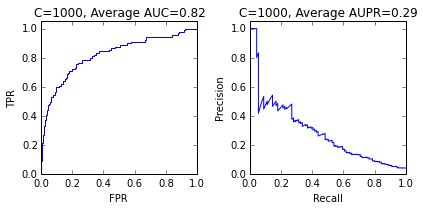

2017-06-04 01:46:09


In [49]:
# svm_rbf_independent svm_rbf_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_rbf = Trial()
svm_rbf.param={'c':0, 'kernel' : 'rbf', 'degree' : 2, 'k' : 10}
with open(path + "906_SVM(RBF)_desc_indep.txt", 'w') as fd :
    user_c = 1000
    svm_rbf.param['c']=user_c
    fd.write("<independent>\r\n")
    svm_rbf.indep_folds_results, svm_rbf.indep_draw_results = svm_rbf.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_rbf.param)
    svm_rbf.draw_plot([svm_rbf.indep_draw_results], svm_rbf.indep_folds_results, user_c)
    svm_rbf.write_output(fd, svm_rbf.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 01:39:14
1000------------------------------------


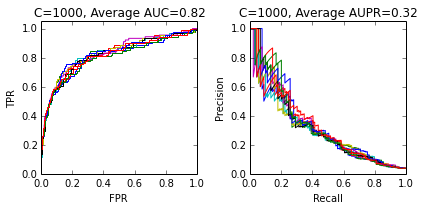

2017-06-04 01:39:47


In [41]:
# Independent svm_rbf_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_rbf = Trial()
svm_rbf.param={'c':0, 'kernel' : 'rbf', 'degree' : 2, 'k' : 10}
svm_rbf.indep_results = dict()
svm_rbf.indep_draw_results = list()
independent_count = 10 
with open(path + "916_svm_rbf_all_desc_indep.txt", 'w') as fd :
    user_c = 1000
    svm_rbf.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    for i in range(10):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        svm_rbf.indep_folds_result, svm_rbf.indep_draw_result = svm_rbf.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_rbf.param)
        svm_rbf.indep_results[i] = svm_rbf.indep_folds_result
        svm_rbf.indep_draw_results.append(svm_rbf.indep_draw_result)
    svm_rbf.indep_seperated = svm_rbf.seperate_results(svm_rbf.indep_results)
    svm_rbf.indep_final_results = svm_rbf.indep_average_result(svm_rbf.indep_seperated)    
    svm_rbf.draw_plot(svm_rbf.indep_draw_results, svm_rbf.indep_final_results, user_c)
    svm_rbf.write_output(fd, svm_rbf.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-04 02:21:19
1000------------------------------------


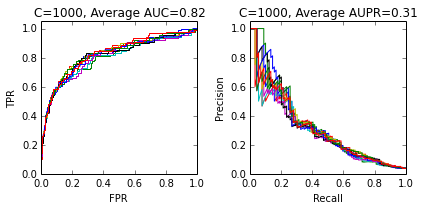

2017-06-04 02:21:52


In [56]:
# Independent svm_rbf_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_rbf = Trial()
svm_rbf.param={'c':0, 'kernel' : 'rbf', 'degree' : 2, 'k' : 10}
svm_rbf.indep_results = dict()
svm_rbf.indep_draw_results = list()
independent_count = 10 
with open(path + "926_svm_rbf_all_desc_indep.txt", 'w') as fd :
    user_c = 1000
    svm_rbf.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    for i in range(10):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        svm_rbf.indep_folds_result, svm_rbf.indep_draw_result = svm_rbf.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_rbf.param)
        svm_rbf.indep_results[i] = svm_rbf.indep_folds_result
        svm_rbf.indep_draw_results.append(svm_rbf.indep_draw_result)
    svm_rbf.indep_seperated = svm_rbf.seperate_results(svm_rbf.indep_results)
    svm_rbf.indep_final_results = svm_rbf.indep_average_result(svm_rbf.indep_seperated)    
    svm_rbf.draw_plot(svm_rbf.indep_draw_results, svm_rbf.indep_final_results, user_c)
    svm_rbf.write_output(fd, svm_rbf.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [9]:
x_resamples =list()
y_resamples =list()
for i in range(30):
    x_resampled, y_resampled = rus.fit_sample(x_whole_data, y_whole_data)
    x_resamples.append(x_resampled)
    y_resamples.append(y_resampled)

2017-06-12 00:50:29
1200------------------------------------


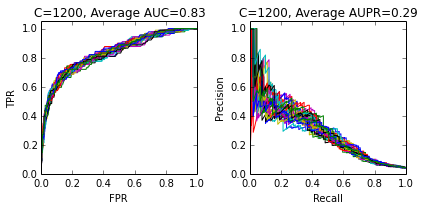

2017-06-12 00:53:47


In [10]:
# Independent rf_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
rf = Trial()
rf.param={'c':0, 'kernel' : 'linear', 'degree' : 2, 'k' : 10}
rf.indep_results = dict()
rf.indep_draw_results = list()
independent_count = 30 
with open(path + "942_rf_all30_desc_indep.txt", 'w') as fd :
    user_c = 1200
    rf.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    for i in range(independent_count):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        rf.indep_folds_result, rf.indep_draw_result = rf.Random_Forest_independent_graph(x_resampled, y_resampled, indep_x, indep_y, rf.param)
        rf.indep_results[i] = rf.indep_folds_result
        rf.indep_draw_results.append(rf.indep_draw_result)
    rf.indep_seperated = rf.seperate_results(rf.indep_results)
    rf.indep_final_results = rf.indep_average_result(rf.indep_seperated)    
    rf.draw_plot(rf.indep_draw_results, rf.indep_final_results, user_c)
    rf.write_output(fd, rf.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2017-06-12 00:53:48
Logistic Regression
1------------------------------------


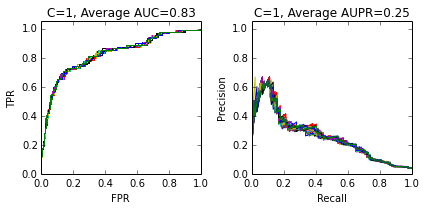

2017-06-12 00:53:55
2017-06-12 00:53:55
Linear SVM
10000------------------------------------


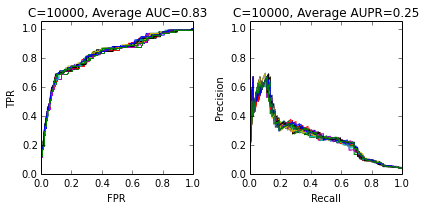

2017-06-12 01:25:01
2017-06-12 01:25:01
Quadratic SVM
10000------------------------------------


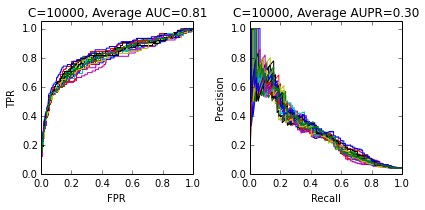

2017-06-12 01:29:29
2017-06-12 01:29:29
Cubic SVM
1000------------------------------------


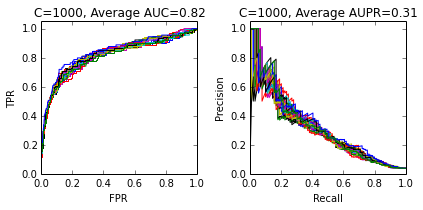

2017-06-12 01:30:29
2017-06-12 01:30:29
RBF SVM
1000------------------------------------


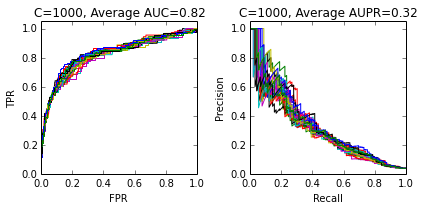

2017-06-12 01:32:08


In [11]:
# Independent LR_K_fold_grpah + 파일 입출력 2017.6.12.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
lr = Trial()
#lr.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10}
lr.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10}
lr.indep_results = dict()
lr.indep_draw_results = list()
independent_count = 30 
with open(path + "941_LR_all30_desc_indep.txt", 'w') as fd :
    user_c = 1
    lr.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    print "Logistic Regression"
    for i in range(independent_count):
        x_resampled = x_resamples[i]
        lr.indep_folds_result, lr.indep_draw_result = lr.Logist_Regression_independent_graph(x_resampled, y_resampled, indep_x, indep_y, lr.param)
        lr.indep_results[i] = lr.indep_folds_result
        lr.indep_draw_results.append(lr.indep_draw_result)
    lr.indep_seperated = lr.seperate_results(lr.indep_results)
    lr.indep_final_results = lr.indep_average_result(lr.indep_seperated)    
    lr.draw_plot(lr.indep_draw_results, lr.indep_final_results, user_c)
    lr.write_output(fd, lr.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')


# Independent svm_li_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_li = Trial()
svm_li.param={'c':0, 'kernel' : 'linear', 'degree' : 2, 'k' : 10}
svm_li.indep_results = dict()
svm_li.indep_draw_results = list()
independent_count = 30 
with open(path + "943_svm_li_all30_desc_indep.txt", 'w') as fd :
    user_c = 10000
    svm_li.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    print "Linear SVM"
    for i in range(independent_count):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        svm_li.indep_folds_result, svm_li.indep_draw_result = svm_li.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_li.param)
        svm_li.indep_results[i] = svm_li.indep_folds_result
        svm_li.indep_draw_results.append(svm_li.indep_draw_result)
    svm_li.indep_seperated = svm_li.seperate_results(svm_li.indep_results)
    svm_li.indep_final_results = svm_li.indep_average_result(svm_li.indep_seperated)    
    svm_li.draw_plot(svm_li.indep_draw_results, svm_li.indep_final_results, user_c)
    svm_li.write_output(fd, svm_li.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Independent svm_qu_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_qu = Trial()
svm_qu.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10}
svm_qu.indep_results = dict()
svm_qu.indep_draw_results = list()
independent_count = 30 
with open(path + "944_svm_qu_all30_desc_indep.txt", 'w') as fd :
    user_c = 10000
    svm_qu.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    print "Quadratic SVM"
    for i in range(independent_count):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        svm_qu.indep_folds_result, svm_qu.indep_draw_result = svm_qu.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_qu.param)
        svm_qu.indep_results[i] = svm_qu.indep_folds_result
        svm_qu.indep_draw_results.append(svm_qu.indep_draw_result)
    svm_qu.indep_seperated = svm_qu.seperate_results(svm_qu.indep_results)
    svm_qu.indep_final_results = svm_qu.indep_average_result(svm_qu.indep_seperated)    
    svm_qu.draw_plot(svm_qu.indep_draw_results, svm_qu.indep_final_results, user_c)
    svm_qu.write_output(fd, svm_qu.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Independent svm_cu_K_fold_grpah + 파일 입출력 2017.6.3.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_cu = Trial()
svm_cu.param={'c':0, 'kernel' : 'poly', 'degree' : 3, 'k' : 10}
svm_cu.indep_results = dict()
svm_cu.indep_draw_results = list()
independent_count = 30 
with open(path + "945_svm_cu_all30_desc_indep.txt", 'w') as fd :
    user_c = 1000
    svm_cu.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    print "Cubic SVM"
    for i in range(independent_count):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        svm_cu.indep_folds_result, svm_cu.indep_draw_result = svm_cu.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_cu.param)
        svm_cu.indep_results[i] = svm_cu.indep_folds_result
        svm_cu.indep_draw_results.append(svm_cu.indep_draw_result)
    svm_cu.indep_seperated = svm_cu.seperate_results(svm_cu.indep_results)
    svm_cu.indep_final_results = svm_cu.indep_average_result(svm_cu.indep_seperated)    
    svm_cu.draw_plot(svm_cu.indep_draw_results, svm_cu.indep_final_results, user_c)
    svm_cu.write_output(fd, svm_cu.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Independent svm_rbf_K_fold_grpah + 파일 입출력 2017.6.12.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/'
svm_rbf = Trial()
svm_rbf.param={'c':0, 'kernel' : 'rbf', 'degree' : 2, 'k' : 10}
svm_rbf.indep_results = dict()
svm_rbf.indep_draw_results = list()
independent_count = 30 
with open(path + "946_svm_rbf_all30_desc_indep.txt", 'w') as fd :
    user_c = 1000
    svm_rbf.param['c']=user_c
    fd.write("<1:1 independent>\r\n")
    print "RBF SVM"
    for i in range(independent_count):
        x_resampled = x_resamples[i]
        y_resampled = y_resamples[i]
        svm_rbf.indep_folds_result, svm_rbf.indep_draw_result = svm_rbf.SVM_independent_graph(x_resampled, y_resampled, indep_x, indep_y, svm_rbf.param)
        svm_rbf.indep_results[i] = svm_rbf.indep_folds_result
        svm_rbf.indep_draw_results.append(svm_rbf.indep_draw_result)
    svm_rbf.indep_seperated = svm_rbf.seperate_results(svm_rbf.indep_results)
    svm_rbf.indep_final_results = svm_rbf.indep_average_result(svm_rbf.indep_seperated)    
    svm_rbf.draw_plot(svm_rbf.indep_draw_results, svm_rbf.indep_final_results, user_c)
    svm_rbf.write_output(fd, svm_rbf.indep_final_results, user_c)   
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

1000------------------------------------
1000------------------------------------
1000------------------------------------
1000------------------------------------
1000------------------------------------
1000------------------------------------


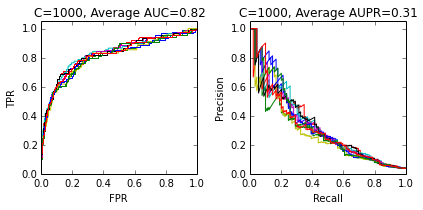

In [67]:
draw_plot_to_file(lr.indep_draw_results,lr.indep_final_results, user_c, "941_LR_all30_desc_indep.png")
draw_plot_to_file(rf.indep_draw_results,rf.indep_final_results, user_c, "942_rf_all30_desc_indep.png")
draw_plot_to_file(svm_li.indep_draw_results,svm_li.indep_final_results, user_c, "943_svm_li_all30_desc_indep.png")
draw_plot_to_file(svm_qu.indep_draw_results,svm_qu.indep_final_results, user_c, "944_svm_qu_all30_desc_indep.png")
draw_plot_to_file(svm_cu.indep_draw_results,svm_cu.indep_final_results, user_c, "945_svm_cu_all30_desc_indep.png")
draw_plot_to_file(svm_rbf.indep_draw_results,svm_rbf.indep_final_results, user_c, "946_svm_rbf_all30_desc_indep.png")

In [8]:
#draw_plot_to_file(all30.draw_total[1200],all30.final_param_results[1200], user_c, "401_RF_all30_desc_training_1200.png")
#draw_plot_to_file(all30.draw_total[1],all30.final_param_results[1], user_c, "301_LR_all30_desc_training_1.png")
def draw_plot_to_file(draw_results, final_result, user_c, filename):
        #colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange', 'red', 'violet', 'fuchsia', 'sienna'])
        colors = ['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange', 'red', 'violet', 'fuchsia', 'sienna']
        lw = 1
        plt.clf()
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
        print "{}------------------------------------".format(user_c)
        for i in draw_results:
            for fpr, tpr in zip(i['fpr'], i['tpr']):
                ax1.plot(fpr, tpr, lw=lw)
            for recall_vec, precision_vec in zip(i['recall_vec'], i['precision_vec']):
                ax2.plot(recall_vec, precision_vec, lw=lw)
        ax1.set_xlabel('FPR')
        ax1.set_ylabel('TPR')
        ax1.set_color_cycle(colors)
        ax1.set_title('C={0}, Average AUC={1:0.2f}'.format(user_c, final_result['auc']))
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlim([0.0, 1.0])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.set_color_cycle(colors)
        ax2.set_title('C={0}, Average AUPR={1:0.2f}'.format(user_c, final_result['aupr']))
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlim([0.0, 1.0])
        plt.tight_layout()
        #plt.show()
        plt.savefig(path + filename)

In [7]:
class Trial :
  
    def Logist_Regression_K_fold_graph(self, X, y, user_parameter):
    
        skf = StratifiedKFold(n_splits=user_parameter['k'], shuffle=True) # n_splits = k (k fold라서.), pos:neg의 비율을 고려해서 k 개의 subgroup으로 나누어줌.
        folds_results = {'acc':[], 'auc':[], 'aupr':[], 'confusion_matrix':[], 'sn':[], 'sp':[], 'precision':[], 'recall':[]}
        draw_results = {'fpr':[], 'tpr':[], 'precision_vec':[], 'recall_vec':[]}
        for training_index, validation_index in skf.split(X, y):           
        #for training_index, validation_index in zip(user_parameter['tridx'], user_parameter['vaidx']):
        #for training_index, validation_index in zip(user_parameter['tridxs'][user_parameter['key']], user_parameter['vaidxs'][user_parameter['key']]):
            x_training_set = X[training_index]
            y_training_set = y[training_index]
            x_validation_set = X[validation_index]
            y_validation_set = y[validation_index]

            #classifier = SVC(C=user_parameter['c'], kernel= user_parameter['kernel'], degree=user_parameter['degree'], probability=True, cache_size=1000) #n_jobs=-1 이면 모든 node 쓰는것, 신경쓰이면 30개 정도.
            classifier = LogisticRegression(penalty='l1', C=user_parameter['c'], n_jobs=-1)
            classifier.fit(x_training_set, y_training_set)

            y_predicted_proba = classifier.predict_proba(x_validation_set) # [0에 대한 확률, 1에 대한 확률], shpae = [n_samples, n_class]
            y_predicted_label = classifier.predict(x_validation_set) # 예측된 label을 보여줌, shpae = [n_samples]

            # Accuracy 
            current_acc = classifier.score(x_validation_set, y_validation_set)
            folds_results['acc'].append(current_acc)

            # AUC
            current_auc = roc_auc_score(y_validation_set, y_predicted_proba[:,1])
            folds_results['auc'].append(current_auc)

            # Sensitivity, Specificity
            sn, sp, support = sensitivity_specificity_support(y_validation_set, y_predicted_label)
            folds_results['sn'].append(sn)
            folds_results['sp'].append(sp)

            # AUPR
            current_aupr = average_precision_score(y_validation_set, y_predicted_proba[:,1])
            folds_results['aupr'].append(current_aupr)

            # Precision, Recall
            precision, recall, _, _ =  precision_recall_fscore_support(y_validation_set, y_predicted_label, average = 'binary')
            folds_results['precision'].append(precision)
            folds_results['recall'].append(recall)

            # Confusion Matrix
            current_confusion_matrix = confusion_matrix(y_validation_set,y_predicted_label)
            folds_results['confusion_matrix'].append(current_confusion_matrix)

            #draw graph
            fpr, tpr, thresholds = roc_curve(y_validation_set, y_predicted_proba[:, 1], pos_label=1)
            draw_results['fpr'].append(fpr)
            draw_results['tpr'].append(tpr)

            precision_vec, recall_vec, _ = precision_recall_curve(y_validation_set, y_predicted_proba[:, 1])
            draw_results['precision_vec'].append(precision_vec)
            draw_results['recall_vec'].append(recall_vec)
        
        return folds_results, draw_results
    
    
    

    def draw_plot(self, draw_results, final_result, user_c):
        #colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange', 'red', 'violet', 'fuchsia', 'sienna'])
        colors = ['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange', 'red', 'violet', 'fuchsia', 'sienna']
        lw = 1
        plt.clf()
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
        print "{}------------------------------------".format(user_c)
        for i in draw_results:
            for fpr, tpr in zip(i['fpr'], i['tpr']):
                ax1.plot(fpr, tpr, lw=lw)
            for recall_vec, precision_vec in zip(i['recall_vec'], i['precision_vec']):
                ax2.plot(recall_vec, precision_vec, lw=lw)
        ax1.set_xlabel('FPR')
        ax1.set_ylabel('TPR')
        ax1.set_color_cycle(colors)
        ax1.set_title('C={0}, Average AUC={1:0.2f}'.format(user_c, final_result['auc']))
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlim([0.0, 1.0])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.set_color_cycle(colors)
        ax2.set_title('C={0}, Average AUPR={1:0.2f}'.format(user_c, final_result['aupr']))
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlim([0.0, 1.0])
        plt.tight_layout()
        plt.show()
    def average_result(self, folds_results):
        avg_result = dict()
        avg_result['avg_acc'] = sum(folds_results['acc']) / len(folds_results['acc'])
        avg_result['avg_auc'] = sum(folds_results['auc']) / len(folds_results['auc'])
        avg_result['avg_aupr'] = sum(folds_results['aupr']) / len(folds_results['aupr'])
        avg_result['avg_sn'] = sum(folds_results['sn']) / len(folds_results['sn'])
        avg_result['avg_sp'] = sum(folds_results['sp']) / len(folds_results['sp'])
        avg_result['avg_precision'] = sum(folds_results['precision']) / len(folds_results['precision'])
        avg_result['avg_recall'] = sum(folds_results['recall']) / len(folds_results['recall'])
        avg_result['sum_confusion_matrix'] = sum(folds_results['confusion_matrix'])

        return avg_result


    def independent_results(self, param_result):
        indep_results = {'indep_acc':[], 'indep_auc':[], 'indep_aupr':[], 'indep_confusion_matrix':[],
                         'indep_sn':[], 'indep_sp':[], 'indep_precision':[], 'indep_recall':[]}
        for fold in param_result:
            indep_results['indep_acc'].append(fold['avg_acc'])
            indep_results['indep_auc'].append(fold['avg_auc'])
            indep_results['indep_aupr'].append(fold['avg_aupr'])
            indep_results['indep_sn'].append(fold['avg_sn'])
            indep_results['indep_sp'].append(fold['avg_sp'])
            indep_results['indep_precision'].append(fold['avg_precision'])
            indep_results['indep_recall'].append(fold['avg_recall'])
            indep_results['indep_confusion_matrix'].append(fold['sum_confusion_matrix'])
        return indep_results

    def final_results (self, indep_results):
        results = {'acc':[], 'auc':[], 'aupr':[], 'confusion_matrix':[],
                   'sn':[], 'sp':[], 'precision':[], 'recall':[]}
        results['acc'] = sum(indep_results['indep_acc']) / len(indep_results['indep_acc'])
        results['auc'] = sum(indep_results['indep_auc']) / len(indep_results['indep_auc'])
        results['aupr'] = sum(indep_results['indep_aupr']) / len(indep_results['indep_aupr'])
        results['sn'] = sum(indep_results['indep_sn']) / len(indep_results['indep_sn'])
        results['sp'] = sum(indep_results['indep_sp']) / len(indep_results['indep_sp'])
        results['precision'] = sum(indep_results['indep_precision']) / len(indep_results['indep_precision'])
        results['recall'] = sum(indep_results['indep_recall']) / len(indep_results['indep_recall'])
        results['confusion_matrix'] = sum(indep_results['indep_confusion_matrix'])
        return results

    def final_results (self,indep_results):
        results = {'acc':[], 'auc':[], 'aupr':[], 'confusion_matrix':[],
                   'sn':[], 'sp':[], 'precision':[], 'recall':[]}
        results['acc'] = sum(indep_results['indep_acc']) / len(indep_results['indep_acc'])
        results['auc'] = sum(indep_results['indep_auc']) / len(indep_results['indep_auc'])
        results['aupr'] = sum(indep_results['indep_aupr']) / len(indep_results['indep_aupr'])
        results['sn'] = sum(indep_results['indep_sn']) / len(indep_results['indep_sn'])
        results['sp'] = sum(indep_results['indep_sp']) / len(indep_results['indep_sp'])
        results['precision'] = sum(indep_results['indep_precision']) / len(indep_results['indep_precision'])
        results['recall'] = sum(indep_results['indep_recall']) / len(indep_results['indep_recall'])
        results['confusion_matrix'] = sum(indep_results['indep_confusion_matrix'])
        return results
    def write_output(self, fd, write_results, user_c):
        fd.write("C={}-------------------------------------------------\r\n".format(user_c))
        fd.write("Accuracy avg : {}\r\n".format(write_results['acc']))
        fd.write("AUC avg : {}\r\n".format(write_results['auc']))
        fd.write("  Sensitivity avg : {}\r\n".format(write_results['sn']))
        fd.write("  Specificity avg : {}\r\n".format(write_results['sp']))
        fd.write("AUPR avg : {}\r\n".format(write_results['aupr']))
        fd.write("  Precision avg : {}\r\n".format(write_results['precision']))
        fd.write("  Recall avg : {}\r\n".format(write_results['recall']))
        fd.write("confusion amtrix : {}\r\n".format(write_results['confusion_matrix']))
        
        
    def Logist_Regression_independent_graph(self, X, y, indep_X, indep_y, param):

        folds_results = dict()
        draw_results = {'fpr':[], 'tpr':[], 'precision_vec':[], 'recall_vec':[]}

        #classifier = SVC(C=param['c'], kernel= param['kernel'], degree=param['degree'], probability=True, cache_size=1000)
        classifier = LogisticRegression(penalty='l1', C=user_c, n_jobs=-1)
        classifier.fit(X, y)
        indep_y_predicted_proba = classifier.predict_proba(indep_X)
        indep_y_predicted_label = classifier.predict(indep_X)

        # Accuracy
        indep_acc = classifier.score(indep_X, indep_y)
        folds_results['acc']=indep_acc

        # AUC
        indep_auc = roc_auc_score(indep_y, indep_y_predicted_proba[:,1])
        folds_results['auc']=indep_auc

        # Sensitivity, Specificity
        indep_sn, indep_sp, support = sensitivity_specificity_support(indep_y, indep_y_predicted_label)
        folds_results['sn']=indep_sn
        folds_results['sp']=indep_sp

        # AUPR
        indep_aupr = average_precision_score(indep_y, indep_y_predicted_proba[:,1])
        folds_results['aupr']=indep_aupr

        # Precision, Recall
        indep_precision, indep_recall, _, _ = precision_recall_fscore_support(indep_y, indep_y_predicted_label, average = 'binary')
        folds_results['precision']=indep_precision
        folds_results['recall']=indep_recall

        # Confusion Matirx
        indep_confusion_matirx = confusion_matrix(indep_y, indep_y_predicted_label)
        folds_results['confusion_matrix']=indep_confusion_matirx

        # draw graph
        indep_fpr, indep_tpr, thresholds = roc_curve(indep_y, indep_y_predicted_proba[:, 1], pos_label=1)
        draw_results['fpr'].append(indep_fpr)
        draw_results['tpr'].append(indep_tpr)

        indep_precision_vec, indep_recall_vec, _ = precision_recall_curve(indep_y, indep_y_predicted_proba[:, 1])
        draw_results['precision_vec'].append(indep_precision_vec)
        draw_results['recall_vec'].append(indep_recall_vec)

        return folds_results, draw_results
    
    def Random_Forest_independent_graph(self, X, y, indep_X, indep_y, param):

        folds_results = dict()
        draw_results = {'fpr':[], 'tpr':[], 'precision_vec':[], 'recall_vec':[]}

        #classifier = SVC(C=param['c'], kernel= param['kernel'], degree=param['degree'], probability=True, cache_size=1000)
        #classifier = LogisticRegression(penalty='l1', C=user_c, n_jobs=-1)
        classifier = RandomForestClassifier(n_estimators=param['c'], n_jobs=-1, class_weight='balanced')
        classifier.fit(X, y)
        indep_y_predicted_proba = classifier.predict_proba(indep_X)
        indep_y_predicted_label = classifier.predict(indep_X)

        # Accuracy
        indep_acc = classifier.score(indep_X, indep_y)
        folds_results['acc']=indep_acc

        # AUC
        indep_auc = roc_auc_score(indep_y, indep_y_predicted_proba[:,1])
        folds_results['auc']=indep_auc

        # Sensitivity, Specificity
        indep_sn, indep_sp, support = sensitivity_specificity_support(indep_y, indep_y_predicted_label)
        folds_results['sn']=indep_sn
        folds_results['sp']=indep_sp

        # AUPR
        indep_aupr = average_precision_score(indep_y, indep_y_predicted_proba[:,1])
        folds_results['aupr']=indep_aupr

        # Precision, Recall
        indep_precision, indep_recall, _, _ = precision_recall_fscore_support(indep_y, indep_y_predicted_label, average = 'binary')
        folds_results['precision']=indep_precision
        folds_results['recall']=indep_recall

        # Confusion Matirx
        indep_confusion_matirx = confusion_matrix(indep_y, indep_y_predicted_label)
        folds_results['confusion_matrix']=indep_confusion_matirx

        # draw graph
        indep_fpr, indep_tpr, thresholds = roc_curve(indep_y, indep_y_predicted_proba[:, 1], pos_label=1)
        draw_results['fpr'].append(indep_fpr)
        draw_results['tpr'].append(indep_tpr)

        indep_precision_vec, indep_recall_vec, _ = precision_recall_curve(indep_y, indep_y_predicted_proba[:, 1])
        draw_results['precision_vec'].append(indep_precision_vec)
        draw_results['recall_vec'].append(indep_recall_vec)

        return folds_results, draw_results
    
    
    def SVM_independent_graph(self, X, y, indep_X, indep_y, param):

        folds_results = dict()
        draw_results = {'fpr':[], 'tpr':[], 'precision_vec':[], 'recall_vec':[]}

        classifier = SVC(C=param['c'], kernel= param['kernel'], degree=param['degree'], probability=True, cache_size=1000)
        classifier.fit(X, y)
        indep_y_predicted_proba = classifier.predict_proba(indep_X)
        indep_y_predicted_label = classifier.predict(indep_X)

        # Accuracy
        indep_acc = classifier.score(indep_X, indep_y)
        folds_results['acc']=indep_acc

        # AUC
        indep_auc = roc_auc_score(indep_y, indep_y_predicted_proba[:,1])
        folds_results['auc']=indep_auc

        # Sensitivity, Specificity
        indep_sn, indep_sp, support = sensitivity_specificity_support(indep_y, indep_y_predicted_label)
        folds_results['sn']=indep_sn
        folds_results['sp']=indep_sp

        # AUPR
        indep_aupr = average_precision_score(indep_y, indep_y_predicted_proba[:,1])
        folds_results['aupr']=indep_aupr

        # Precision, Recall
        indep_precision, indep_recall, _, _ = precision_recall_fscore_support(indep_y, indep_y_predicted_label, average = 'binary')
        folds_results['precision']=indep_precision
        folds_results['recall']=indep_recall

        # Confusion Matirx
        indep_confusion_matirx = confusion_matrix(indep_y, indep_y_predicted_label)
        folds_results['confusion_matrix']=indep_confusion_matirx

        # draw graph
        indep_fpr, indep_tpr, thresholds = roc_curve(indep_y, indep_y_predicted_proba[:, 1], pos_label=1)
        draw_results['fpr'].append(indep_fpr)
        draw_results['tpr'].append(indep_tpr)

        indep_precision_vec, indep_recall_vec, _ = precision_recall_curve(indep_y, indep_y_predicted_proba[:, 1])
        draw_results['precision_vec'].append(indep_precision_vec)
        draw_results['recall_vec'].append(indep_recall_vec)

        return folds_results, draw_results
    
    def indep_average_result(self, folds_results):
        avg_result = dict()
        avg_result['acc'] = sum(folds_results['acc']) / len(folds_results['acc'])
        avg_result['auc'] = sum(folds_results['auc']) / len(folds_results['auc'])
        avg_result['aupr'] = sum(folds_results['aupr']) / len(folds_results['aupr'])
        avg_result['sn'] = sum(folds_results['sn']) / len(folds_results['sn'])
        avg_result['sp'] = sum(folds_results['sp']) / len(folds_results['sp'])
        avg_result['precision'] = sum(folds_results['precision']) / len(folds_results['precision'])
        avg_result['recall'] = sum(folds_results['recall']) / len(folds_results['recall'])
        avg_result['confusion_matrix'] = sum(folds_results['confusion_matrix'])

        return avg_result

    def seperate_results(self, indep_results):
        temp_results = {'acc':[], 'auc':[], 'aupr':[], 'confusion_matrix':[], 'sn':[], 'sp':[], 'precision':[], 'recall':[]}
        for i in range(independent_count):
            temp_results['acc'].append(indep_results[i]['acc'])
            temp_results['auc'].append(indep_results[i]['auc'])
            temp_results['aupr'].append(indep_results[i]['aupr'])
            temp_results['confusion_matrix'].append(indep_results[i]['confusion_matrix'])
            temp_results['sn'].append(indep_results[i]['sn'])
            temp_results['sp'].append(indep_results[i]['sp'])
            temp_results['precision'].append(indep_results[i]['precision'])
            temp_results['recall'].append(indep_results[i]['recall'])
        return temp_results
